In [1]:
from pathlib import Path
import cv2
import sys
import numpy as np
from skimage import feature, measure
import livecell_tracker
from livecell_tracker.core import datasets
from livecell_tracker.core.datasets import LiveCellImageDataset
import livecell_tracker.segment
from livecell_tracker import core
import livecell_tracker.core.utils
from tqdm import tqdm
import json
from livecell_tracker.core import (
    SingleCellTrajectory,
    SingleCellStatic,
    SingleCellTrajectoryCollection,
)
import livecell_tracker.trajectory.contour.contour_class
import matplotlib.pyplot as plt
from livecell_tracker.trajectory import feature_extractors
traj_collection_json_path = "../datasets/test_data/traj_analysis/track_singleCellTrajectoryCollection.json"
traj_collection_json = json.load(open(traj_collection_json_path, "r"))
trajectory_collection = SingleCellTrajectoryCollection().load_from_json_dict(traj_collection_json)

In [2]:
traj = trajectory_collection.get_trajectory(1)
sc_obj = traj.get_single_cell(0)

In [3]:
trajectory_collection.get_trajectory(1).raw_img_dataset, sc_obj.img_dataset

(<livecell_tracker.core.datasets.LiveCellImageDataset at 0x1bf40a910>,
 <livecell_tracker.core.datasets.LiveCellImageDataset at 0x1bf40a910>)

(-0.5, 312.5, 272.5, -0.5)

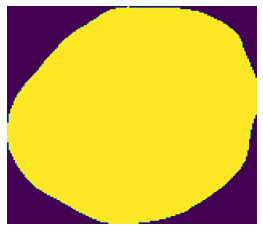

In [4]:
contour_mask = sc_obj.get_contour_mask()
plt.imshow(contour_mask)
plt.axis("off")

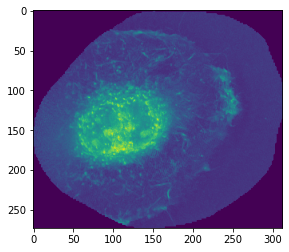

In [5]:
plt.imshow(sc_obj.get_contour_img())

In [6]:
feature_extractors.compute_haralick_features(sc_obj)
sc_obj.add_feature("haralick", feature_extractors.compute_haralick_features(sc_obj))

In [7]:
sc_obj.get_contour_mask().shape, sc_obj.get_img().shape

((273, 313), (2408, 2408))

In [8]:
skimage_features = feature_extractors.compute_skimage_regionprops(sc_obj)
sc_obj.add_feature("skimage", skimage_features)

In [9]:
import pandas as pd
from traitlets import Callable
traj.compute_features("haralick", feature_extractors.compute_haralick_features)
traj.compute_features("skimage", feature_extractors.compute_skimage_regionprops)

In [12]:
traj.get_sc_feature_table()

,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,haralick_9,...,skimage_moments_weighted_normalized-2-2,skimage_moments_weighted_normalized-2-3,skimage_moments_weighted_normalized-3-0,skimage_moments_weighted_normalized-3-1,skimage_moments_weighted_normalized-3-2,skimage_moments_weighted_normalized-3-3,skimage_orientation,skimage_perimeter,skimage_perimeter_crofton,skimage_solidity
0,0.006229,23.366386,0.963650,321.375446,0.329655,61.294356,1262.135396,6.143964,8.946849,0.001111,...,0.000004,1.214922e-07,-0.000007,-1.302566e-06,-4.388542e-08,-6.806057e-09,-1.177540,1014.523953,964.510537,0.990437
1,0.008094,36.806798,0.962256,487.499879,0.306234,65.583931,1913.192719,5.864840,8.810595,0.000705,...,0.000003,1.072020e-07,-0.000002,-1.115744e-06,-3.783517e-08,-5.437439e-09,-1.104018,1029.695526,978.894090,0.990053
2,0.006897,41.276821,0.963110,559.354565,0.287136,71.691002,2196.141437,6.006258,9.057515,0.000676,...,0.000003,8.532403e-08,-0.000006,-9.414977e-07,-3.415069e-08,-4.285916e-09,-1.122199,1016.482323,966.367188,0.991241
